In [1]:
import requests
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Set up your NewsAPI key
api_key = 'b2511b910b17425eaa970b4c579e415b'

In [3]:
stock_info = {
    'AAPL': 'Apple'
}

In [4]:
# Define the API endpoint
endpoint = 'https://newsapi.org/v2/everything'

# Create a list to store English articles with symbols and sentiment scores
articles_with_sentiment = []

# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [5]:
# Iterate through each stock symbol
for stock_symbol, stock_name in stock_info.items():
    params = {
        'q': stock_name,
        'language': 'en',
        'apiKey': api_key
    }
    
    # Make the API request
    response = requests.get(endpoint, params=params)
    data = response.json()

    # Check if the response has 'articles' key
    if 'articles' in data:
        articles = data['articles']

        # Process and add articles to the list
        for article in articles:
            if article['description'] is not None:  # Check for None description
                # Calculate sentiment score using VADER
                sentiment_scores = sid.polarity_scores(article['description'])
                sentiment = sentiment_scores['compound']

                # Append article data to the list
                articles_with_sentiment.append({
                        'Stock Name': stock_name,
                        'Sentiment': sentiment,
                        'Publishing Date': article['publishedAt'],
                        'Description': article['description']
                    })

In [6]:
# Create a DataFrame from the collected data
df = pd.DataFrame(articles_with_sentiment)

df['Sentiment'] = df['Sentiment'].astype(float)

In [7]:
# df.to_csv('data_pull2_0802.csv', index=False)


In [8]:
# Preprocess the text data (e.g., lowercase, tokenization)

# Split the data into features (X) and target (y)
X = df['Description']
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Random Forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Predict stock symbols for the test set
y_pred = model.predict(X_test_tfidf)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.06835406622489998


Mean Squared Error: 0.057052474980422443


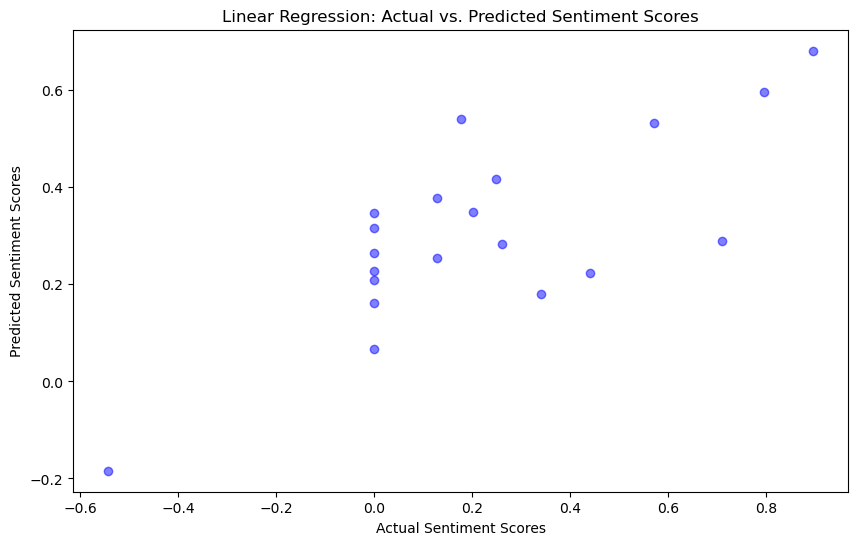

In [9]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_tfidf, y_train)

# Predict sentiment for the test set
y_pred = model.predict(X_test_tfidf)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the model predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Sentiment Scores')
plt.ylabel('Predicted Sentiment Scores')
plt.title('Linear Regression: Actual vs. Predicted Sentiment Scores')
plt.show()

In [10]:
# Assuming your DataFrame is named 'df' and the column with dates is 'date'
df.sort_values(by='Publishing Date', ascending=True, inplace=True)

# If you want to reset the index after sorting
df.reset_index(drop=True, inplace=True)

In [11]:
df

,Stock Name,Sentiment,Publishing Date,Description
0,Apple,0.4019,2023-07-03T02:00:00Z,iPhone users in Australia can now receive next...
1,Apple,-0.4939,2023-07-03T05:10:22Z,Apple forced to make cuts to Vision Pro produc...
2,Apple,-0.1779,2023-07-03T11:31:53Z,"In a baffling move over the weekend, Elon Musk..."
3,Apple,0.2500,2023-07-03T13:51:46Z,Doctor Apple is coming in with another fastbal...
4,Apple,0.3818,2023-07-03T17:30:00Z,After reports teasing a launch date of June fo...
...,...,...,...,...
95,Apple,0.3612,2023-07-31T17:34:19Z,Get ready for school with sales on laptops and...
96,Apple,0.7269,2023-08-01T14:47:08Z,Air Canada today announced that its in-flight ...
97,Apple,0.0000,2023-08-01T21:11:27Z,Samba de Amigo is coming to Apple Arcade. Sega...
98,Apple,0.1280,2023-08-02T18:06:57Z,Apple Card holders have deposited more than $1...


In [12]:
# Convert the 'Publishing Date' column to datetime format
df['Publishing Date'] = pd.to_datetime(df['Publishing Date'])

In [13]:
# Group the data by date and calculate the average sentiment for each date
sentiment_by_date = df.groupby('Publishing Date')['Sentiment'].mean()

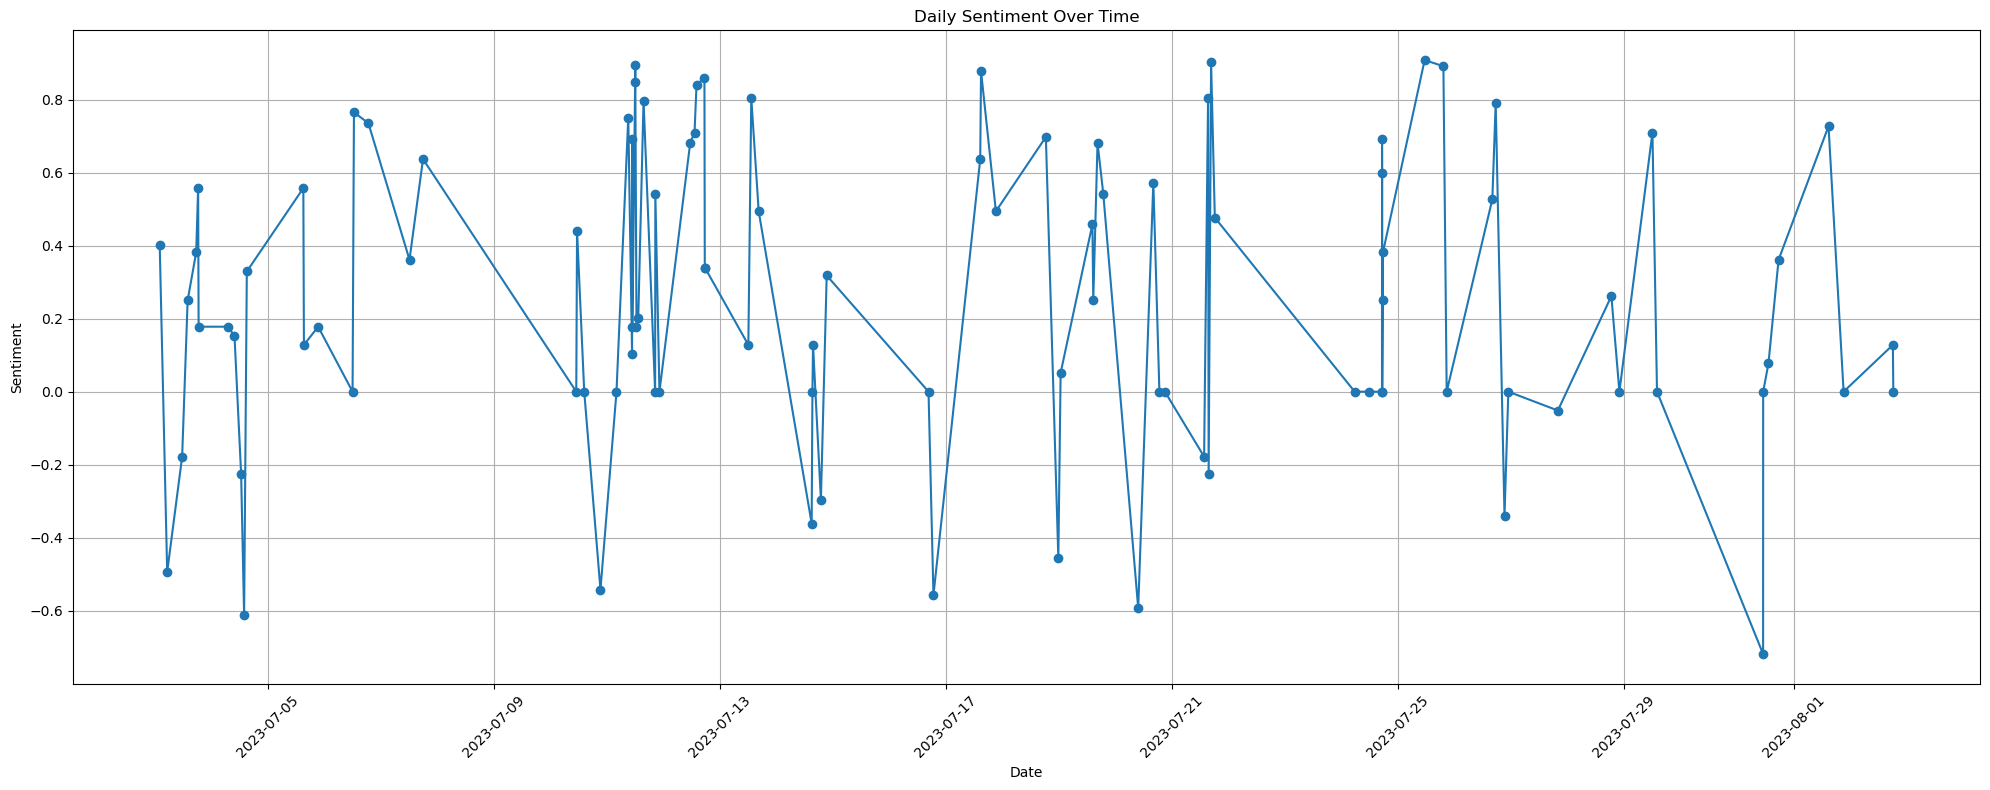

In [14]:
# Plot the line graph for DAILY SENTIMENT
plt.figure(figsize=(20, 8))  # Optional: Adjust the figure size as needed
plt.plot(sentiment_by_date.index, sentiment_by_date.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.title('Daily Sentiment Over Time')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better visibility
plt.grid(True)  # Optional: Add grid lines
plt.tight_layout()  # Optional: Ensure the plot is properly arranged

# Show the plot
plt.show()


In [15]:
import yfinance as yf

# Define the date range
start_date = '2023-07-03'
end_date = '2023-08-03'

# Fetch historical stock data for AAPL
aapl_data = yf.download('AAPL', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


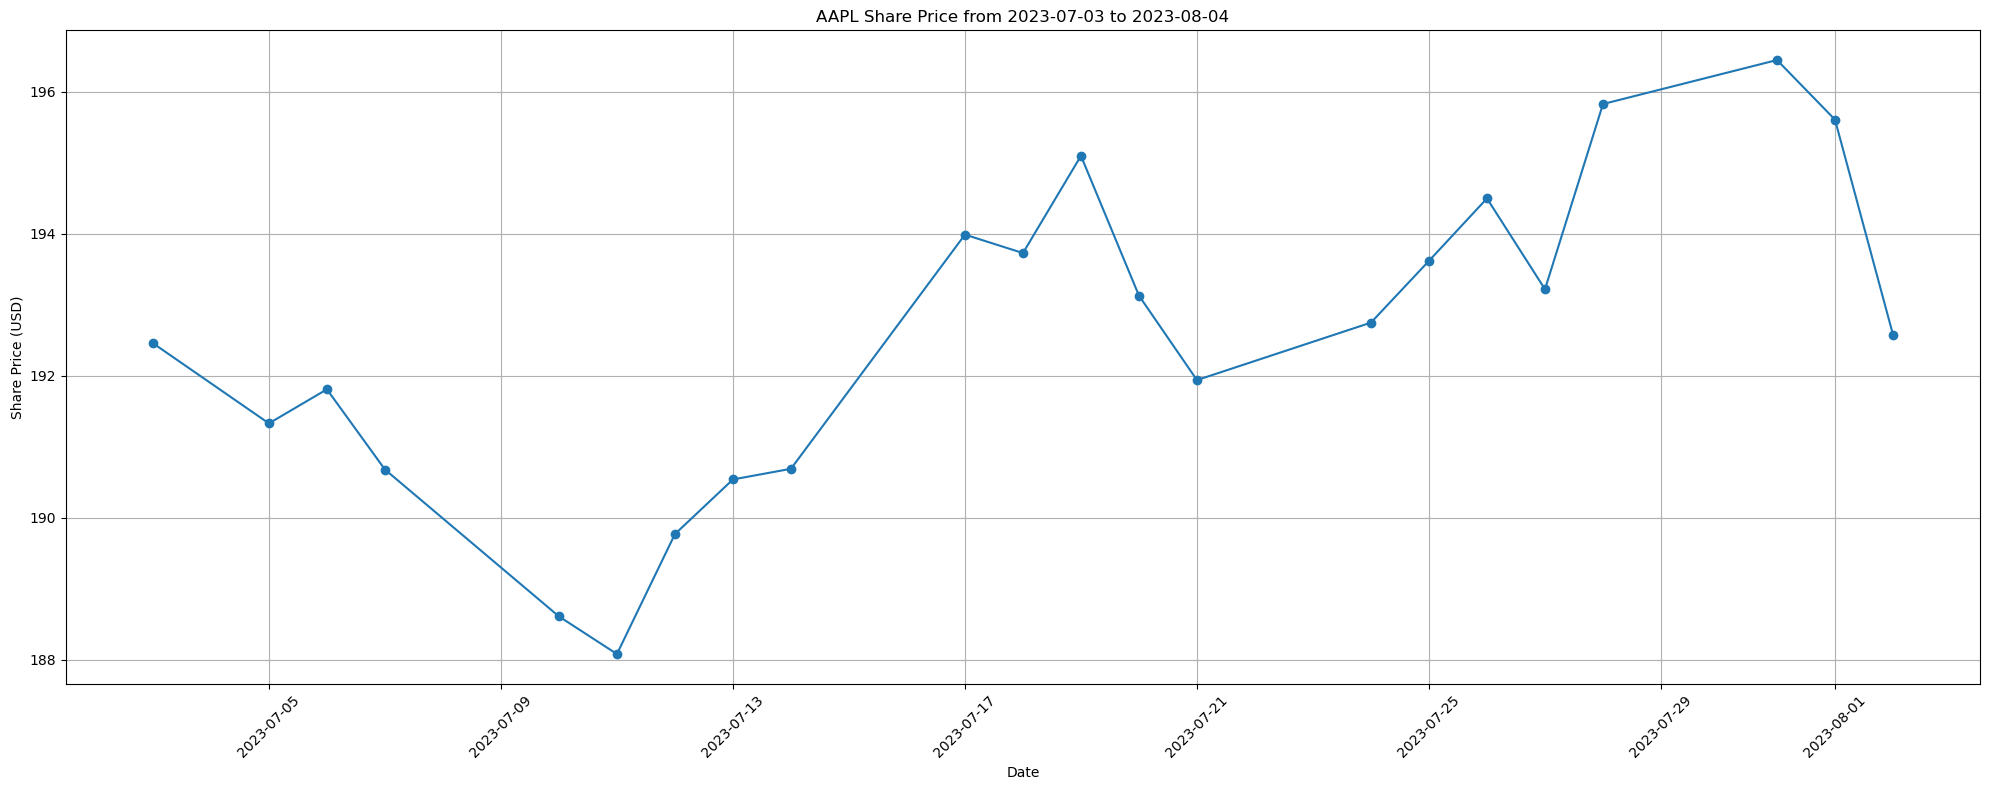

In [16]:
# Create a line graph
plt.figure(figsize=(20, 8))  # Optional: Adjust the figure size as needed
plt.plot(aapl_data.index, aapl_data['Close'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Share Price (USD)')
plt.title('AAPL Share Price from 2023-07-03 to 2023-08-04')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better visibility
plt.grid(True)  # Optional: Add grid lines
plt.tight_layout()  # Optional: Ensure the plot is properly arranged

# Show the plot
plt.show()

In [17]:
# Calculate daily percentage change
aapl_data['Daily_percent_change'] = aapl_data['Close'].pct_change() * 100

# Drop the first row with NaN (due to percentage change calculation)
aapl_data.dropna(subset=['Daily_percent_change'], inplace=True)
aapl_data


,Open,High,Low,Close,Adj Close,Volume,Daily_percent_change
Date,,,,,,,
2023-07-05,191.570007,192.979996,190.619995,191.330002,191.330002,46920300,-0.587138
2023-07-06,189.839996,192.020004,189.199997,191.809998,191.809998,45094300,0.250873
2023-07-07,191.410004,192.669998,190.240005,190.679993,190.679993,46778000,-0.589127
2023-07-10,189.259995,189.990005,187.039993,188.610001,188.610001,59922200,-1.085584
2023-07-11,189.160004,189.300003,186.600006,188.080002,188.080002,46638100,-0.281002
2023-07-12,189.679993,191.699997,188.470001,189.770004,189.770004,60750200,0.898555
2023-07-13,190.500000,191.190002,189.779999,190.539993,190.539993,41342300,0.405749
2023-07-14,190.229996,191.179993,189.630005,190.690002,190.690002,41573900,0.078728
2023-07-17,191.899994,194.320007,191.809998,193.990005,193.990005,50520200,1.730559


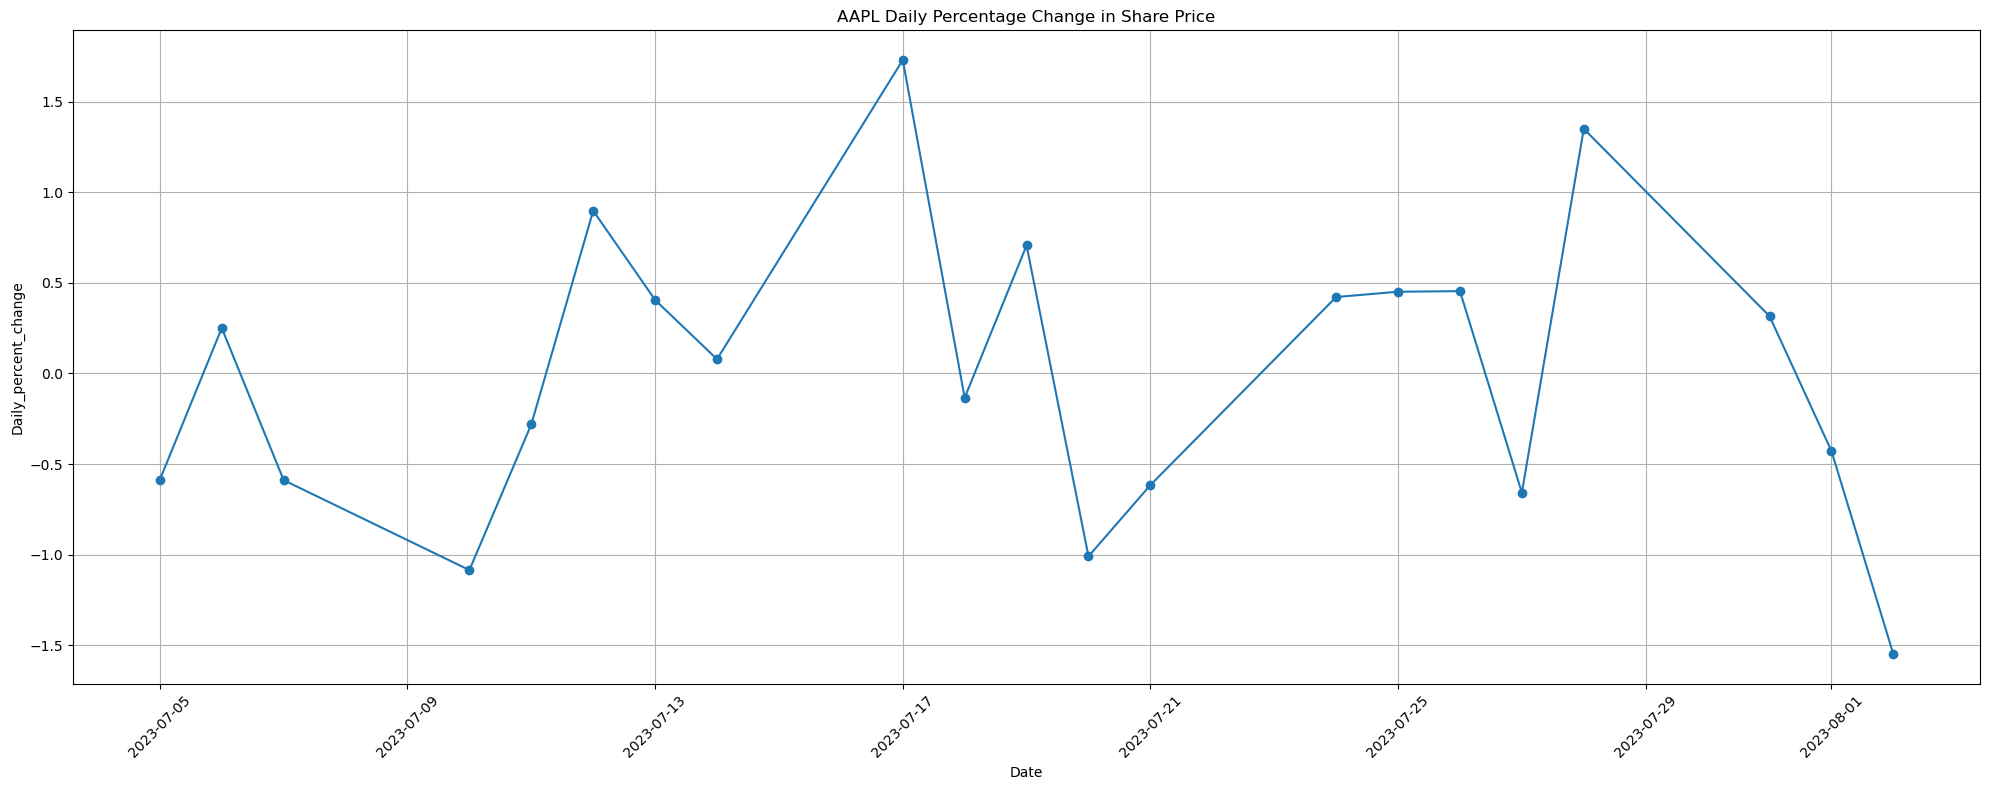

In [18]:
# Create a line chart
plt.figure(figsize=(20, 8))  # Optional: Adjust the figure size as needed
plt.plot(aapl_data.index, aapl_data['Daily_percent_change'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Daily_percent_change')
plt.title('AAPL Daily Percentage Change in Share Price')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better visibility
plt.grid(True)  # Optional: Add grid lines
plt.tight_layout()  # Optional: Ensure the plot is properly arranged

# Show the plot
plt.show()

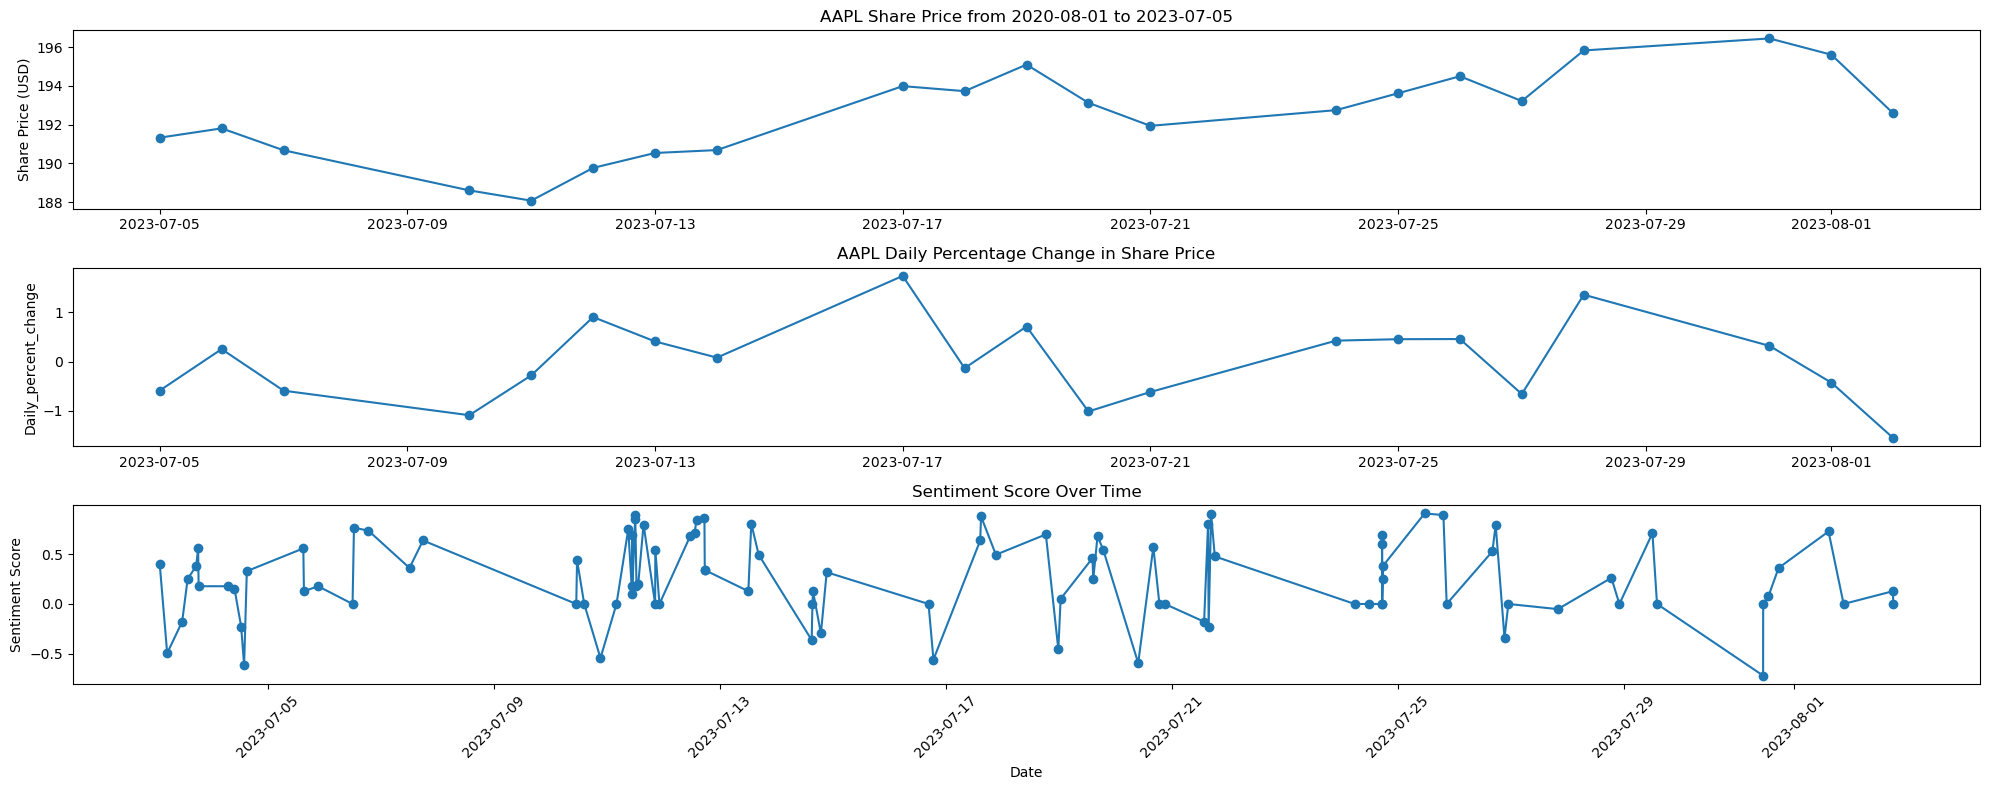

In [19]:
# Create a new figure with 1 subplot
plt.figure(figsize=(20, 8))

# Plot 1: AAPL Share Price
plt.subplot(3, 1, 1)
plt.plot(aapl_data.index, aapl_data['Close'], marker='o', linestyle='-')
plt.ylabel('Share Price (USD)')
plt.title('AAPL Share Price from 2020-08-01 to 2023-07-05')

# Plot 2: AAPL Daily Percentage Change
plt.subplot(3, 1, 2)
plt.plot(aapl_data.index, aapl_data['Daily_percent_change'], marker='o', linestyle='-')
plt.ylabel('Daily_percent_change')
plt.title('AAPL Daily Percentage Change in Share Price')

# Plot 3: Sentiment Line Graph (Assuming you already have a DataFrame called 'df' with sentiment data)
# Assuming your DataFrame is named 'df' and the column with dates is 'Publishing Date'
df.sort_values(by='Publishing Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
plt.subplot(3, 1, 3)
plt.plot(df['Publishing Date'], df['Sentiment'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Over Time')

plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better visibility
plt.tight_layout()  # Optional: Ensure the subplots don't overlap

# Show the plots together in the same cell
plt.show()

In [20]:
# Function to map sentiment scores to sentiment categories
def map_sentiment(sentiment_score):
    if sentiment_score >= 0.05:
        return "Positive"
    elif sentiment_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply the function to create the 'Sentiment Ranking' column
df['Sentiment Ranking'] = df['Sentiment'].apply(map_sentiment)

# Create a new DataFrame with relevant columns
new_df = df[['Stock Name', 'Sentiment', 'Publishing Date', 'Sentiment Ranking', 'Description']].copy()

# Display the new DataFrame
new_df

,Stock Name,Sentiment,Publishing Date,Sentiment Ranking,Description
0,Apple,0.4019,2023-07-03 02:00:00+00:00,Positive,iPhone users in Australia can now receive next...
1,Apple,-0.4939,2023-07-03 05:10:22+00:00,Negative,Apple forced to make cuts to Vision Pro produc...
2,Apple,-0.1779,2023-07-03 11:31:53+00:00,Negative,"In a baffling move over the weekend, Elon Musk..."
3,Apple,0.2500,2023-07-03 13:51:46+00:00,Positive,Doctor Apple is coming in with another fastbal...
4,Apple,0.3818,2023-07-03 17:30:00+00:00,Positive,After reports teasing a launch date of June fo...
...,...,...,...,...,...
95,Apple,0.3612,2023-07-31 17:34:19+00:00,Positive,Get ready for school with sales on laptops and...
96,Apple,0.7269,2023-08-01 14:47:08+00:00,Positive,Air Canada today announced that its in-flight ...
97,Apple,0.0000,2023-08-01 21:11:27+00:00,Neutral,Samba de Amigo is coming to Apple Arcade. Sega...
98,Apple,0.1280,2023-08-02 18:06:57+00:00,Positive,Apple Card holders have deposited more than $1...
